<a href="https://colab.research.google.com/github/yaramirezte/TelecomX_LATAM-Parte-2/blob/main/TelecomX_LATAM_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparación de los Datos


## Extracción del Archivo Tratado

In [80]:
import pandas as pd

In [81]:
url = "https://raw.githubusercontent.com/yaramirezte/TelecomX_LATAM-Parte-2/refs/heads/main/data/datos_tratados.csv"

try:
    df = pd.read_csv(url)
    print("✅ Datos cargados exitosamente desde GitHub")
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")


✅ Datos cargados exitosamente desde GitHub


In [82]:
df.head()

,ID_Cliente,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Tipo_Internet,...,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios,Segmento_Gasto_Diario,Cantidad_Servicios
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,One year,1,Mailed check,65.6,593.30,2.19,Medium,4
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00,Medium,3
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,Medium,2
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,High,5
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80,High,3


In [83]:
df.describe()

,Evasion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Factura_Digital,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios,Cantidad_Servicios
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158675,3.362914
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003088,2.062031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.180000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.340000,3.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.990000,5.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000,8.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7043 non-null   object 
 1   Evasion                 7043 non-null   int64  
 2   Genero                  7043 non-null   object 
 3   Adulto_Mayor            7043 non-null   int64  
 4   Tiene_Pareja            7043 non-null   int64  
 5   Tiene_Dependientes      7043 non-null   int64  
 6   Antiguedad_Meses        7043 non-null   int64  
 7   Servicio_Telefonico     7043 non-null   int64  
 8   Multiples_Lineas        7043 non-null   int64  
 9   Tipo_Internet           7043 non-null   object 
 10  Seguridad_Online        7043 non-null   int64  
 11  Backup_Online           7043 non-null   int64  
 12  Proteccion_Dispositivo  7043 non-null   int64  
 13  Soporte_Tecnico         7043 non-null   int64  
 14  Streaming_TV            7043 non-null   

## Eliminación de Columnas Irrelevantes

In [85]:
df.columns

Index(['ID_Cliente', 'Evasion', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja',
       'Tiene_Dependientes', 'Antiguedad_Meses', 'Servicio_Telefonico',
       'Multiples_Lineas', 'Tipo_Internet', 'Seguridad_Online',
       'Backup_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Factura_Digital', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales',
       'Cargos_Diarios', 'Segmento_Gasto_Diario', 'Cantidad_Servicios'],
      dtype='object')

In [86]:
if 'ID_Cliente' in df.columns:
  df = df.drop(columns=['ID_Cliente'])

In [87]:
df.columns

Index(['Evasion', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja',
       'Tiene_Dependientes', 'Antiguedad_Meses', 'Servicio_Telefonico',
       'Multiples_Lineas', 'Tipo_Internet', 'Seguridad_Online',
       'Backup_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Factura_Digital', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales',
       'Cargos_Diarios', 'Segmento_Gasto_Diario', 'Cantidad_Servicios'],
      dtype='object')

Se eliminó la columna `ID_Cliente` por tratarse de un identificador único sin valor predictivo.
Este tipo de variables no contribuye al modelo y puede introducir ruido o sobreajuste.

## Encoding

In [88]:
df['Evasion'].value_counts()

,count
Evasion,
0,5174
1,1869


In [89]:
y = df['Evasion']
X = df.drop(columns=['Evasion'])

In [90]:
X.dtypes

,0
Genero,object
Adulto_Mayor,int64
Tiene_Pareja,int64
Tiene_Dependientes,int64
Antiguedad_Meses,int64
Servicio_Telefonico,int64
Multiples_Lineas,int64
Tipo_Internet,object
Seguridad_Online,int64
Backup_Online,int64


In [91]:
X.columns

Index(['Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes',
       'Antiguedad_Meses', 'Servicio_Telefonico', 'Multiples_Lineas',
       'Tipo_Internet', 'Seguridad_Online', 'Backup_Online',
       'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
       'Streaming_Peliculas', 'Tipo_Contrato', 'Factura_Digital',
       'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargos_Diarios',
       'Segmento_Gasto_Diario', 'Cantidad_Servicios'],
      dtype='object')

In [92]:
# Transforma todas las variables categóricas dentro de X a formato numérico
X = pd.get_dummies(X, drop_first=True) # Se usa drop_first=True para evitar la multicolinealidad, lo cual es crítico para la estabilidad de la Regresión Logística.

In [93]:
X.head()

,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,...,Tipo_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check,Segmento_Gasto_Diario_Low,Segmento_Gasto_Diario_Medium,Segmento_Gasto_Diario_Very High,Segmento_Gasto_Diario_Very Low
0,0,1,1,9,1,0,0,1,0,1,...,False,True,False,False,False,True,False,True,False,False
1,0,0,0,9,1,1,0,0,0,0,...,False,False,False,False,False,True,False,True,False,False
2,0,0,0,4,1,0,0,0,1,0,...,False,False,False,False,True,False,False,True,False,False
3,1,1,0,13,1,0,0,1,1,0,...,False,False,False,False,True,False,False,False,False,False
4,1,1,0,3,1,0,0,0,0,1,...,False,False,False,False,False,True,False,False,False,False


In [94]:
X.shape

(7043, 29)

In [95]:
X = X.astype(int) # Casteo de variables a tipo entero para asegurar compatibilidad con el modelo

In [96]:
X.sample(5)

,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,...,Tipo_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check,Segmento_Gasto_Diario_Low,Segmento_Gasto_Diario_Medium,Segmento_Gasto_Diario_Very High,Segmento_Gasto_Diario_Very Low
3150,1,0,0,13,1,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
5510,0,0,0,2,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2332,0,0,0,12,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6214,0,0,0,60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0
4343,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [97]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Adulto_Mayor                         7043 non-null   int64
 1   Tiene_Pareja                         7043 non-null   int64
 2   Tiene_Dependientes                   7043 non-null   int64
 3   Antiguedad_Meses                     7043 non-null   int64
 4   Servicio_Telefonico                  7043 non-null   int64
 5   Multiples_Lineas                     7043 non-null   int64
 6   Seguridad_Online                     7043 non-null   int64
 7   Backup_Online                        7043 non-null   int64
 8   Proteccion_Dispositivo               7043 non-null   int64
 9   Soporte_Tecnico                      7043 non-null   int64
 10  Streaming_TV                         7043 non-null   int64
 11  Streaming_Peliculas                  7043 non-null   int

Se aplicó One-Hot Encoding utilizando `pd.get_dummies()` para transformar las variables categóricas en variables numéricas compatibles con algoritmos de machine learning.

Se utilizó el parámetro `drop_first=True` para evitar multicolinealidad.

## Verificación de la Proporción de Cancelación (Churn)

In [98]:
y.value_counts()

,count
Evasion,
0,5174
1,1869


In [99]:
(y.value_counts(normalize=True) *100).round(2)
# Identificamos un desbalance de clases: la clase mayoritaria (leales) duplica a la minoritaria (cancelaciones).

,proportion
Evasion,
0,73.46
1,26.54


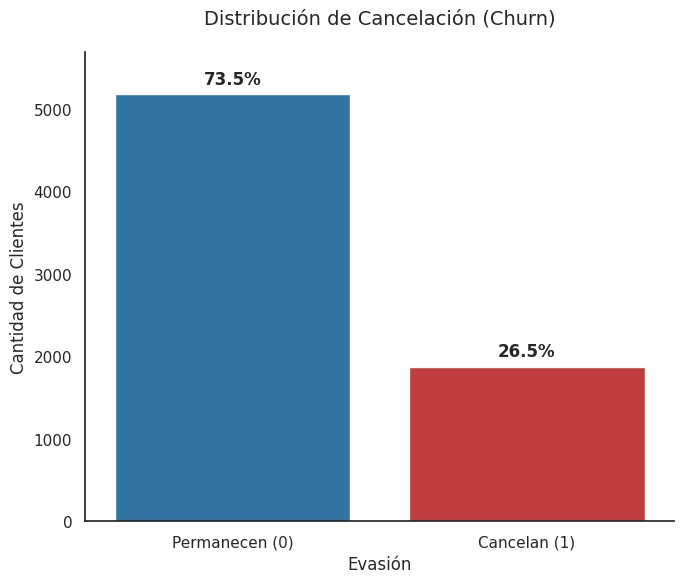

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")
plt.figure(figsize=(7, 6))

# Calculamos los porcentajes
total = len(y)
ax = sns.countplot(x=y, hue=y, palette=['#1f77b4', '#d62728'], legend=False)

# se añade el porcentaje sobre cada barra
for p in ax.patches:
    percentage = f'{(100 * p.get_height() / total):.1f}%'
    x = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()

    ax.annotate(percentage,
                (x, y_pos),
                ha='center', va='bottom',
                fontsize=12,
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribución de Cancelación (Churn)', fontsize=14, pad=20)
plt.xticks([0, 1], ['Permanecen (0)', 'Cancelan (1)'])
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Evasión')

# Ajustamos el límite de Y para que el porcentaje no quede cortado
plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

sns.despine()
plt.tight_layout()
plt.savefig('distribucion_clases.png', bbox_inches='tight')
plt.show()

Se observa un desbalance moderado en la variable objetivo (Evasion). Aproximadamente 26.54% de los clientes cancelaron el servicio, mientras que 73.46% permanecieron activos.

## Balanceo de Clases

Dado que observamos un desbalanceo en la variable Evasion, utilizaremos la técnica SMOTE. Esto evitará que los modelos ignoren la clase minoritaria y mejorará el Recall.

In [101]:
!pip install imbalanced-learn

In [102]:
from sklearn.model_selection import train_test_split

# Dividimos el dataset manteniendo la distribución original de la variable objetivo (stratify).
# Esto es vital debido al desbalanceo de clases detectado en la fase de exploración.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y)

In [103]:
nombres_columnas = X_train.columns

In [104]:
from imblearn.over_sampling import SMOTE

# Inicializamos SMOTE con semilla fija para asegurar la reproducibilidad
smote = SMOTE(random_state=42)

# Aplicamos remuestreo sintético para balancear las clases.
# Esto previene que el modelo se sesgue hacia la clase mayoritaria (no evasión).

X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [105]:
# verificamos el nuevo balance
y_train_bal.value_counts()

,count
Evasion,
0,3622
1,3622


Se aplicó la técnica SMOTE sobre el conjunto de entrenamiento para balancear las clases, generando ejemplos sintéticos de la clase minoritaria. Esto permite que el modelo aprenda mejor los patrones asociados a la cancelación sin afectar el conjunto de prueba.

## Normalización o Estandarización

### Ajuste de Escalas

Dado que algoritmos como la **Regresión Logística** son sensibles a las diferentes escalas de los datos, aplicaremos `StandardScaler`. Esto transforma las variables para que tengan una media de 0 y una desviación estándar de 1, garantizando que variables con rangos grandes (como `Cargos_Totales`) no dominen injustamente el modelo sobre variables con rangos pequeños.

In [106]:

from sklearn.preprocessing import StandardScaler

# Aseguramos que el conjunto de prueba tenga las mismas columnas que el de entrenamiento
X_test = X_test[X_train_bal.columns]

scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

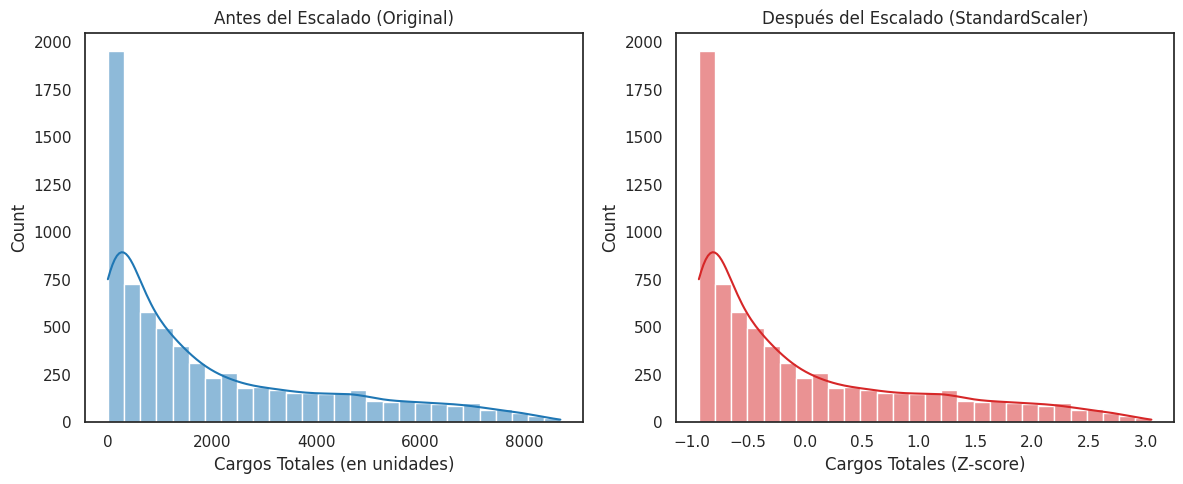

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 1. Gráfico Antes del Escalado (Datos Originales)
sns.histplot(X_train_bal['Cargos_Totales'], kde=True, color='#1f77b4', ax=ax1)
ax1.set_title('Antes del Escalado (Original)')
ax1.set_xlabel('Cargos Totales (en unidades)')

# 2. Gráfico Después del Escalado (Datos Estandarizados)
# Convertimos el array escalado a DataFrame para extraer la columna
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_bal.columns)
sns.histplot(X_train_scaled_df['Cargos_Totales'], kde=True, color='#d62728', ax=ax2)
ax2.set_title('Después del Escalado (StandardScaler)')
ax2.set_xlabel('Cargos Totales (Z-score)')

plt.tight_layout()
plt.savefig('comparacion_escalado.png', bbox_inches='tight')
plt.show()

In [108]:
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[ 7.84696561e-18  9.41635873e-17  7.84696561e-17  6.27757249e-17
 -2.02059364e-16  2.35408968e-17 -6.27757249e-17  1.56939312e-17
 -4.70817936e-17  4.70817936e-17  7.84696561e-18  5.49287593e-17
 -1.20156661e-16 -7.84696561e-17 -7.84696561e-18  7.45461733e-17
  0.00000000e+00 -4.70817936e-17  6.27757249e-17  6.27757249e-17
  4.70817936e-17 -7.84696561e-17  1.56939312e-17  4.51200522e-17
 -5.49287593e-17  1.76556726e-17  4.70817936e-17  2.74643796e-17
  7.84696561e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [109]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_bal.columns)
X_train_scaled_df.sample(5)

,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,...,Tipo_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check,Segmento_Gasto_Diario_Low,Segmento_Gasto_Diario_Medium,Segmento_Gasto_Diario_Very High,Segmento_Gasto_Diario_Very Low
6156,2.525229,-0.7697,-0.525382,-1.104766,0.326801,-0.789842,-0.508657,-0.601802,-0.610106,-0.518102,...,-0.441794,-0.419037,-0.444915,-0.429684,1.374594,-0.467224,-0.389447,2.155491,-0.387329,-0.502199
7048,-0.396004,-0.7697,-0.525382,-0.018797,0.326801,-0.789842,-0.508657,-0.601802,-0.610106,-0.518102,...,-0.441794,-0.419037,-0.444915,-0.429684,1.374594,-0.467224,-0.389447,-0.463931,-0.387329,-0.502199
4063,-0.396004,-0.7697,-0.525382,-0.394709,0.326801,1.266075,1.965963,-0.601802,1.639059,-0.518102,...,-0.441794,-0.419037,-0.444915,-0.429684,-0.727487,2.140302,-0.389447,2.155491,-0.387329,-0.502199
4204,-0.396004,-0.7697,-0.525382,-0.311173,0.326801,1.266075,-0.508657,1.661675,-0.610106,1.930123,...,-0.441794,2.386422,-0.444915,-0.429684,1.374594,-0.467224,-0.389447,2.155491,-0.387329,-0.502199
4137,2.525229,-0.7697,-0.525382,-1.062997,0.326801,-0.789842,-0.508657,-0.601802,-0.610106,-0.518102,...,-0.441794,-0.419037,-0.444915,-0.429684,1.374594,-0.467224,2.567741,-0.463931,-0.387329,-0.502199


### Logistica de Regression con datos escalados

In [110]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train_bal)

y_pred_log = log_model.predict(X_test_scaled)
y_pred_log

array([0, 0, 1, ..., 1, 0, 0])

### Random Forest sin escalado

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

y_pred_rf = rf_model.predict(X_test)

Se aplicó estandarización únicamente para los modelos sensibles a la escala (Regresión Logística), utilizando StandardScaler ajustado sobre el conjunto de entrenamiento. Los modelos basados en árboles no requieren este preprocesamiento, ya que no son sensibles a la magnitud de las variables.

# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

In [112]:
df_model = pd.concat([X,y], axis=1)
df_model.head()

,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,...,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check,Segmento_Gasto_Diario_Low,Segmento_Gasto_Diario_Medium,Segmento_Gasto_Diario_Very High,Segmento_Gasto_Diario_Very Low,Evasion
0,0,1,1,9,1,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
1,0,0,0,9,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,4,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,1,1,0,13,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,1,1,0,3,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [133]:
corr = df_model.corr()['Evasion'].sort_values(ascending=False)
corr.sort_values(ascending=False).head(6)

,Evasion
Evasion,1.000000
Tipo_Internet_Fiber optic,0.308020
Metodo_Pago_Electronic check,0.301919
Cargos_Diarios,0.196022
Cargos_Mensuales,0.193422
Factura_Digital,0.191825


In [114]:
corr.sort_values(ascending=False).tail(6)

,Evasion
Tipo_Contrato_One year,-0.177820
Cargos_Totales,-0.198326
Segmento_Gasto_Diario_Very Low,-0.201181
Tipo_Internet_No,-0.227890
Tipo_Contrato_Two year,-0.302253
Antiguedad_Meses,-0.352229


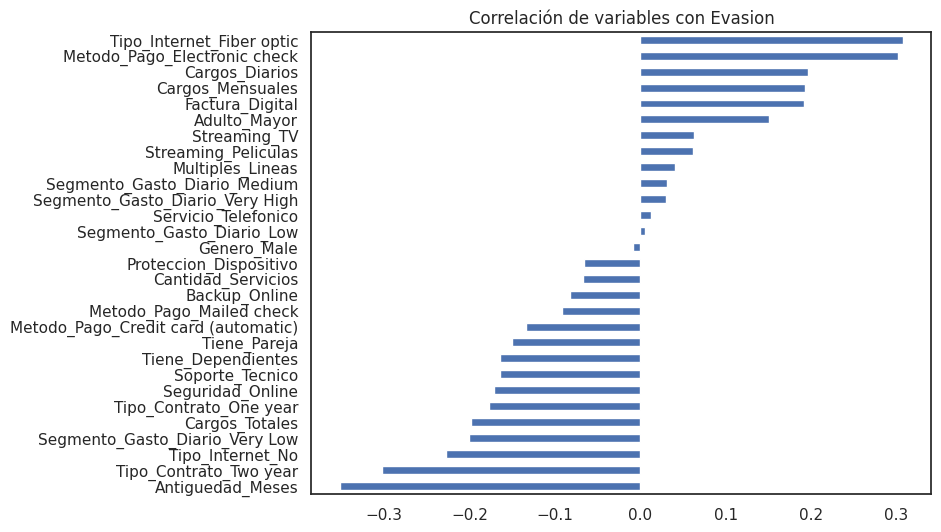

In [115]:
# correlación con Evasion
plt.figure(figsize=(8, 6))
corr.drop('Evasion').sort_values().plot(kind='barh')
plt.title('Correlación de variables con Evasion')
plt.savefig('Correlación_variables_con_Evasion.png', bbox_inches='tight')
plt.show()

El análisis de correlación revela que la antigüedad del cliente y el tipo de contrato son los factores más fuertemente asociados a la cancelación. Los clientes con contratos de largo plazo presentan menor probabilidad de churn, mientras que aquellos con contrato mensual y pago mediante electronic check muestran mayor riesgo. Asimismo, los clientes con fibra óptica y mayores cargos mensuales presentan mayor propensión a cancelar. Estos hallazgos sugieren que la estrategia de retención debería enfocarse en incentivar contratos de largo plazo y monitorear clientes nuevos con planes de alto costo.

## Análisis Dirigido

### Tiempo de contrato por Cancelación

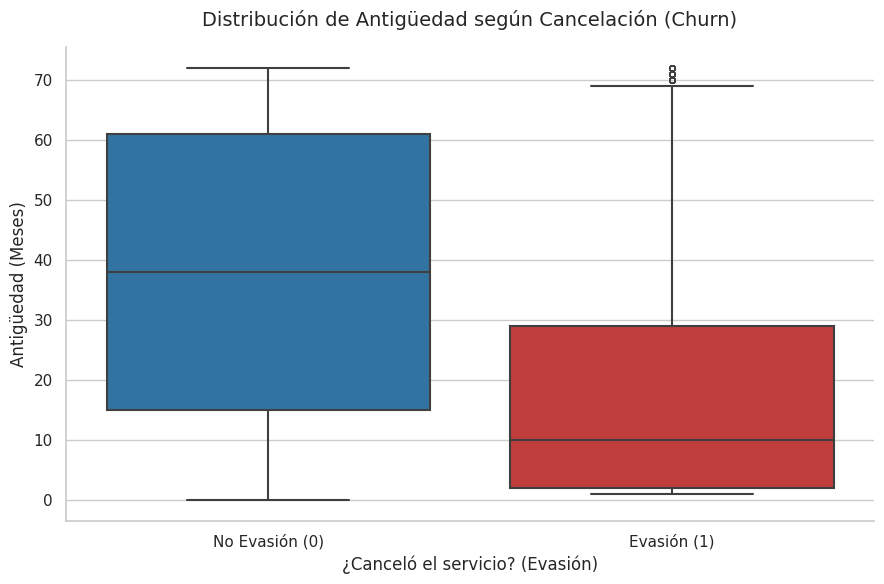

In [116]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(9, 6))

ax = sns.boxplot(
    data=df_model,
    x='Evasion',
    y='Antiguedad_Meses',
    hue='Evasion',
    palette=['#1f77b4', '#d62728'], # Azul para 'No', Rojo para 'Sí'
    linewidth=1.5,
    fliersize=4,      # es el tamaño de los puntos de outliers
    legend=False
)

plt.title('Distribución de Antigüedad según Cancelación (Churn)', fontsize=14, pad=15)
plt.xlabel('¿Canceló el servicio? (Evasión)', fontsize=12)
plt.ylabel('Antigüedad (Meses)', fontsize=12)

plt.xticks([0, 1], ['No Evasión (0)', 'Evasión (1)'])

sns.despine() # eliminamos bordes innecesarios

plt.tight_layout()
plt.show()

Se observa que los clientes que cancelan el servicio presentan, en promedio, menor antigüedad. Esto sugiere que el riesgo de cancelación es mayor en los primeros meses del contrato.

### Gasto total por Cancelación

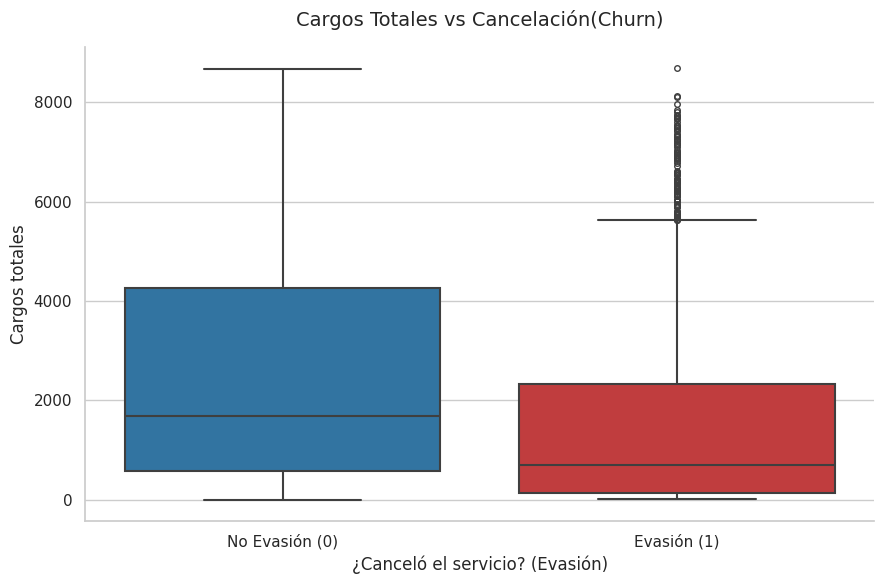

In [117]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(9, 6))

ax = sns.boxplot(
    data=df_model,
    x='Evasion',
    y='Cargos_Totales',
    hue='Evasion',
    palette=['#1f77b4', '#d62728'], # Azul para 'No', Rojo para 'Sí'
    linewidth=1.5,
    fliersize=4,      #  es el tamaño de los puntos de outliers
    legend=False
)

plt.title('Cargos Totales vs Cancelación(Churn)', fontsize=14, pad=15)
plt.xlabel('¿Canceló el servicio? (Evasión)', fontsize=12)
plt.ylabel('Cargos totales', fontsize=12)

plt.xticks([0, 1], ['No Evasión (0)', 'Evasión (1)'])

sns.despine() # Eliminamos bordes innecesarios

plt.tight_layout()
plt.savefig('boxplot_antiguedad.png', bbox_inches='tight')
plt.show()

El análisis muestra que los clientes que cancelan el servicio presentan un menor gasto total acumulado en comparación con aquellos que permanecen activos. Esto sugiere que la cancelación tiende a ocurrir en etapas tempranas del ciclo de vida del cliente, antes de que se genere un alto valor acumulado. Por lo tanto, el periodo inicial del contrato representa una etapa crítica para implementar estrategias de retención.

Con el objetivo de profundizar en las variables que mostraron mayor correlación con la cancelación, se realizó un análisis visual dirigido para identificar patrones claros entre tipo de contrato, gasto total y evasión.

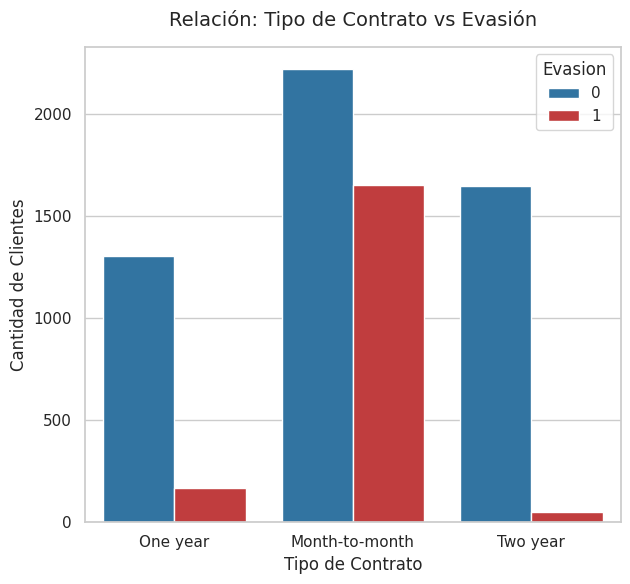

In [118]:
sns.set_style("whitegrid")

plt.rcParams['figure.figsize'] = (12, 6)

# Gráfica 1: Tiempo de Contrato por Cancelación
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Tipo_Contrato', hue='Evasion', palette=['#1f77b4', '#d62728'])

plt.title('Relación: Tipo de Contrato vs Evasión', fontsize=14, pad=15)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(rotation=0) # Forzamos a que estén a 0 grados (horizontal)


plt.tight_layout()
plt.savefig('Tipo_Contrato_vs_Evasión.png', bbox_inches='tight')
plt.show()

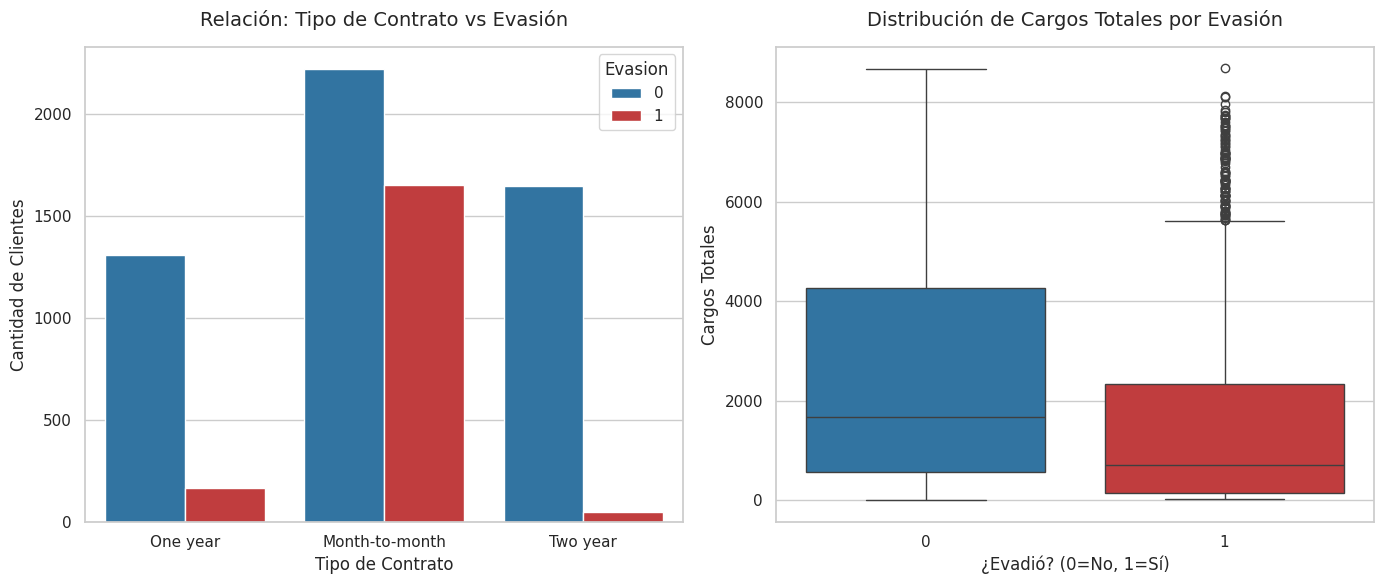

In [119]:
sns.set_style("whitegrid")

plt.rcParams['figure.figsize'] = (14, 6)

# Gráfica 1: Tiempo de Contrato por Cancelación
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Tipo_Contrato', hue='Evasion', palette=['#1f77b4', '#d62728'])

plt.title('Relación: Tipo de Contrato vs Evasión', fontsize=14, pad=15)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(rotation=0) # Forzamos a que estén a 0 grados (horizontal)

# Gráfica 2: Gasto Total por Cancelación
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Evasion', y='Cargos_Totales', hue='Evasion', palette=['#1f77b4', '#d62728'])

plt.title('Distribución de Cargos Totales por Evasión', fontsize=14, pad=15)
plt.xlabel('¿Evadió? (0=No, 1=Sí)', fontsize=12)
plt.ylabel('Cargos Totales', fontsize=12)

if plt.gca().get_legend():
    plt.gca().get_legend().remove()

plt.tight_layout()
#plt.savefig('Tipo_contrato_vs_Evasion_&_Distribucion_cargos_por_Evasion.png', bbox_inches='tight')
plt.show()

Los clientes con contratos mensuales presentan una mayor proporción de cancelación en comparación con aquellos que poseen contratos de mayor duración. Además, los clientes que cancelan tienden a registrar menores cargos totales acumulados, lo que sugiere un menor nivel de permanencia o compromiso con la empresa.

Estos hallazgos indican que los clientes con menor compromiso contractual y menor inversión acumulada representan el segmento con mayor riesgo de churn.

# 🤖 Modelado Predictivo

## Separación de Datos


La división del conjunto de datos en entrenamiento (70%) y prueba (30%) fue realizada previamente como parte del pipeline de preparación para modelado, manteniendo la proporción de la variable objetivo mediante stratify=y

## Creación de Modelos


Para la Regresión Logística, se aplicó estandarización mediante StandardScaler, ya que este modelo se entrena mediante métodos de optimización por gradiente y es sensible a la magnitud de las variables. Cuando existen diferencias significativas en escala por ejemplo, una variable en el rango de 0 a 100,000 (como Cargos_Totales) frente a otra en el rango de 0 a 1, aquellas con mayor magnitud pueden influir desproporcionadamente en el proceso de optimización. La estandarización garantiza que todas las variables contribuyan de manera equilibrada al modelo.

En contraste, Random Forest, al ser un modelo basado en árboles de decisión, no es sensible a la escala de las variables. Su funcionamiento se basa en la búsqueda de puntos de corte óptimos en cada variable, por lo que no depende de distancias ni magnitudes relativas. Por esta razón, no se aplicó escalado a este modelo.

La estandarización se realizó después del proceso de balanceo de clases, asegurando coherencia en el flujo de preprocesamiento.

## Evaluación de los Modelos

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

# Función para obtener métricas
def evaluar_modelo(y_real, y_pred, nombre_modelo):
    """ Calcula y muestra las métricas de desempeño de un modelo de clasificación. """
    print(f'---Evaluación: {nombre_modelo}---')
    print(f'Accuracy: {accuracy_score(y_real, y_pred):.4f}')
    print(f'Precision: {precision_score(y_real, y_pred):.4f}')
    print(f'Recall: {recall_score(y_real, y_pred):.4f}')
    print(f'F1-score: {f1_score(y_real, y_pred):.4f}')
    print('\nMatriz de Confusión:')
    print(confusion_matrix(y_real, y_pred))
    print('-'*30)

### Regresión Logística

---Evaluación: Regresión Logística (con escalado)---
Accuracy: 0.7700
Precision: 0.5554
Recall: 0.6702
F1-score: 0.6074

Matriz de Confusión:
[[1251  301]
 [ 185  376]]
------------------------------


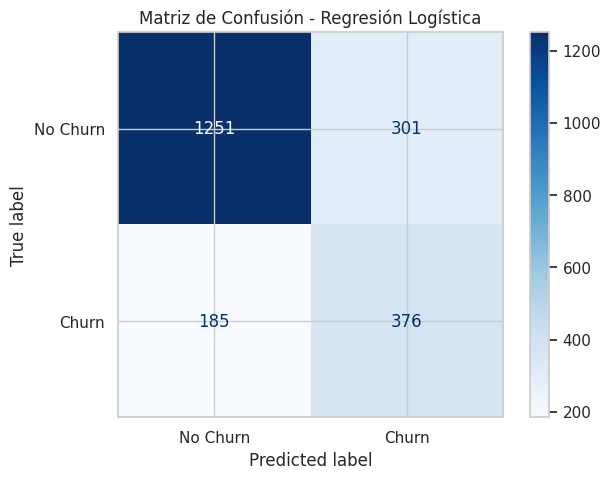

In [121]:
# --- Evaluar Regresión Logística ---
evaluar_modelo(y_test, y_pred_log, 'Regresión Logística (con escalado)')

# 2. Se genera la grafica de Matriz de Confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['No Churn', 'Churn'])

fig, ax = plt.subplots(figsize=(7, 5))
disp_log.plot(cmap='Blues', ax=ax)
plt.title('Matriz de Confusión - Regresión Logística')

plt.savefig('matriz_logistica.png', bbox_inches='tight')
plt.show()

El modelo de Regresión Logística alcanzó una Exactitud (Accuracy) del 77%, lo cual parece alto, pero al analizar las métricas de negocio observamos oportunidades de mejora.

El Recall del 67% indica que el modelo es capaz de capturar a 2 de cada 3 clientes en riesgo de fuga. Sin embargo, la Precisión del 55.5% sugiere un alto número de falsas alarmas (301 casos), lo que podría derivar en costos innecesarios si se ofrecen incentivos de retención a clientes que no pensaban cancelar. El F1-Score de 0.60 refleja este equilibrio entre la capacidad de detección y la precisión de las alertas.

### Random Forest

In [122]:
# Evaluar Random Forest con modelo base
evaluar_modelo(y_test, y_pred_rf, 'Random Forest (sin escalado)')

---Evaluación: Random Forest (sin escalado)---
Accuracy: 0.7648
Precision: 0.5539
Recall: 0.5865
F1-score: 0.5697

Matriz de Confusión:
[[1287  265]
 [ 232  329]]
------------------------------


In [123]:
# Entrenamiento de Random Forest sin escalado ajustando el modelo
from sklearn.ensemble import RandomForestClassifier

# Limitamos la profundidad (max_depth) para controlar la complejidad y evitar Overfitting
# Aumentamos de 100 a 200 árboles
rf_model = RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42 )

# Entrenamos sobre los datos balanceados (X_train_bal)
rf_model.fit(X_train_bal, y_train_bal)

# Predicción sobre el conjunto de prueba (X_test)
y_pred_rf = rf_model.predict(X_test)

Se realizó un ajuste de hiperparámetros en el modelo Random Forest, limitando la profundidad máxima a 10 y aumentando el número de árboles a 200. Este ajuste tuvo como objetivo reducir el sobreajuste y mejorar la capacidad de generalización del modelo.

In [124]:
# Evaluar Random Forest con modelo ajustado
evaluar_modelo(y_test, y_pred_rf, 'Random Forest (sin escalado) Ajustado')

---Evaluación: Random Forest (sin escalado) Ajustado---
Accuracy: 0.7577
Precision: 0.5334
Recall: 0.6970
F1-score: 0.6043

Matriz de Confusión:
[[1210  342]
 [ 170  391]]
------------------------------


---Evaluación: Random Forest (sin escalado) Ajustado---
Accuracy: 0.7577
Precision: 0.5334
Recall: 0.6970
F1-score: 0.6043

Matriz de Confusión:
[[1210  342]
 [ 170  391]]
------------------------------


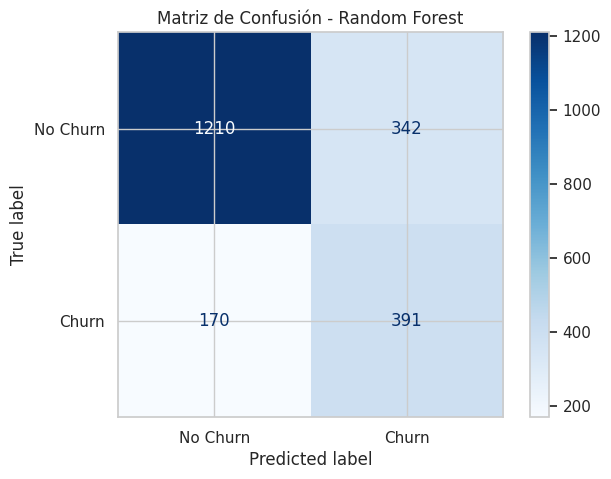

In [125]:
# --- Evaluar Random Forest ---
evaluar_modelo(y_test, y_pred_rf, 'Random Forest (sin escalado) Ajustado')

# se genera Matriz de Confusión para RF
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Churn', 'Churn'])

fig, ax = plt.subplots(figsize=(7, 5))
disp_rf.plot(cmap='Blues', ax=ax)
plt.title('Matriz de Confusión - Random Forest')

plt.savefig('matriz_rf.png', bbox_inches='tight')
plt.show()

Tras el ajuste, el recall de la clase de cancelación aumentó de 0.59 a 0.70, lo que representa una mejora significativa en la identificación de clientes en riesgo. Aunque la exactitud global disminuyó ligeramente, el modelo optimizado resulta más adecuado para el problema de churn, donde la detección de clientes que cancelan es prioritaria.

**comparación de modelos:**

Al comparar ambos modelos, se determinó que el Random Forest Ajustado es la mejor opción para Telecom X, a pesar de tener una exactitud ligeramente menor.

La razón principal es el Recall (0.6970). Mientras que la Regresión Logística dejó escapar a 185 clientes que cancelaron, el Random Forest logró reducir esa cifra a 170, detectando a 391 clientes en riesgo (15 más que el modelo anterior).

En un problema de Churn, el costo de perder a un cliente (Falso Negativo) suele ser mucho más alto que el costo de ofrecer un incentivo a alguien que no pensaba irse (Falso Positivo). Por lo tanto, priorizamos el modelo que mejor 'atrapa' las fugas.

## Análisis Crítico y Comparación de Modelos

Se evaluaron tres configuraciones: Regresión Logística, Random Forest base y Random Forest ajustado.

Aunque la Regresión Logística presentó una exactitud ligeramente superior, el Random Forest ajustado logró el mayor recall en la clase de cancelación (0.697), lo que indica mejor capacidad para identificar clientes en riesgo.

Dado que en problemas de churn la prioridad es detectar correctamente a los clientes que cancelarán, el Random Forest ajustado se considera el modelo más adecuado.

No se observaron señales evidentes de overfitting, ya que el desempeño en el conjunto de prueba se mantuvo estable y no mostró diferencias extremas respecto al comportamiento esperado. El ajuste de hiperparámetros, particularmente la limitación de la profundidad del árbol, ayudó a controlar la complejidad del modelo.

Tampoco se identificaron indicios claros de underfitting, dado que el modelo logró capturar patrones relevantes sin presentar métricas excesivamente bajas.

# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

### Importancia en Regresión Logística (coeficientes)

In [126]:
coeficientes = pd.Series(
    log_model.coef_[0],
    index=X_train.columns
)
coeficientes.sort_values(ascending=False).head(10)

,0
Cantidad_Servicios,4.712016
Cargos_Mensuales,2.503834
Cargos_Totales,1.533738
Tipo_Internet_No,0.803520
Segmento_Gasto_Diario_Very High,0.203537
Factura_Digital,0.090818
Adulto_Mayor,-0.053840
Tiene_Pareja,-0.111894
Cargos_Diarios,-0.124595
Genero_Male,-0.153556


In [127]:
coeficientes.sort_values().head(10)

,0
Antiguedad_Meses,-2.108105
Streaming_Peliculas,-1.670713
Streaming_TV,-1.630658
Servicio_Telefonico,-1.618606
Backup_Online,-1.519288
Soporte_Tecnico,-1.501279
Seguridad_Online,-1.451610
Proteccion_Dispositivo,-1.439033
Multiples_Lineas,-1.402048
Tipo_Internet_Fiber optic,-0.981389


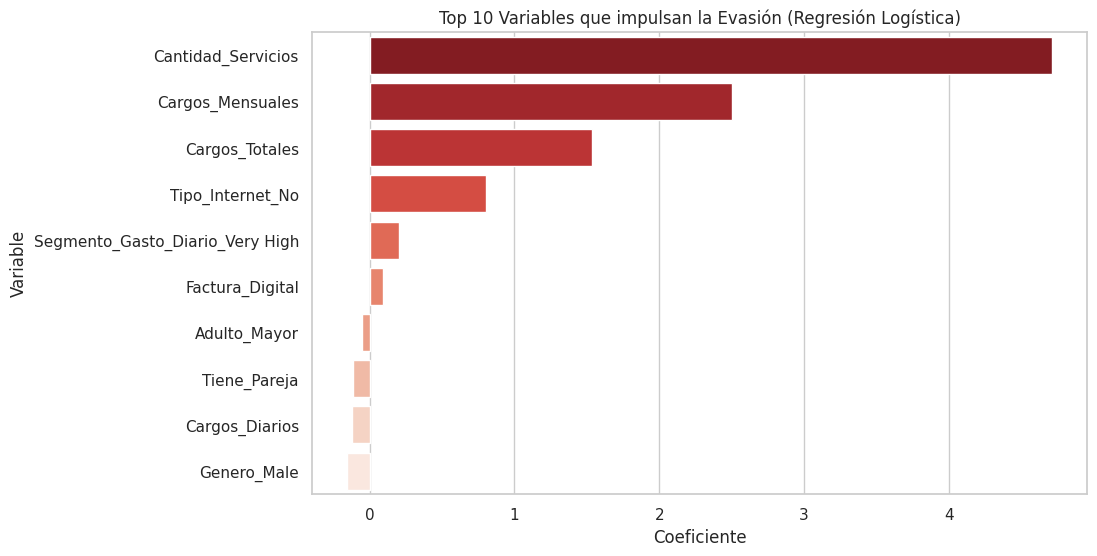

In [128]:
import matplotlib.pyplot as plt

# Extraer coeficientes
importancias_lr = pd.DataFrame({
    'Variable': nombres_columnas,
    'Coeficiente': log_model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

# Graficar los 10 más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importancias_lr.head(10), x='Coeficiente', y='Variable',hue='Variable', palette='Reds_r')
plt.title('Top 10 Variables que impulsan la Evasión (Regresión Logística)')
plt.savefig('importancia_variables.png', bbox_inches='tight')
plt.show()

La Regresión Logística identificó como variables con mayor impacto positivo en la probabilidad de cancelación la cantidad de servicios contratados y los cargos mensuales. Esto sugiere que clientes con mayor gasto recurrente presentan mayor riesgo de evasión, posiblemente debido a sensibilidad al precio o percepción de alto costo.

Asimismo, el modelo indica que ciertos segmentos de gasto elevado presentan mayor probabilidad de churn.

En contraste, variables como tener pareja o género masculino muestran una ligera reducción en la probabilidad de cancelación, aunque su impacto es menor en comparación con las variables económicas.

Estos resultados refuerzan la importancia de factores financieros en la decisión de cancelación.

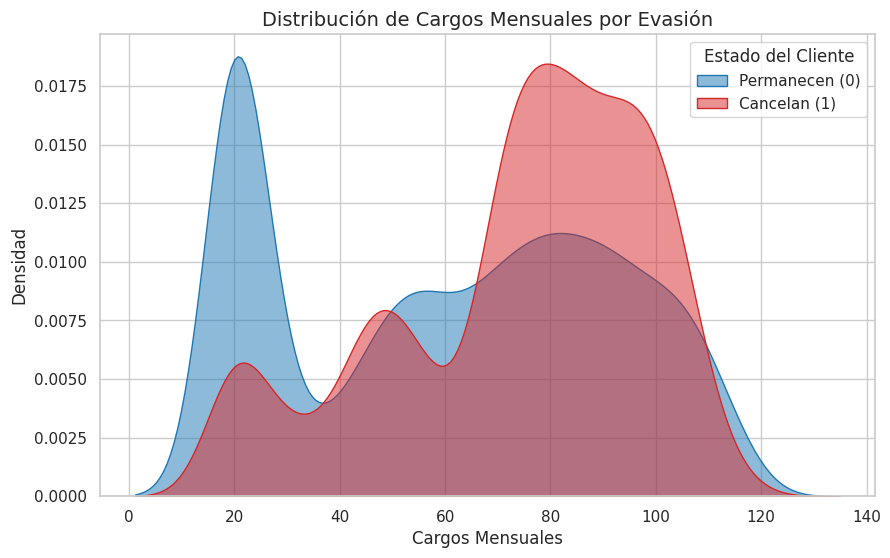

In [129]:
plt.figure(figsize=(10, 6))

# Graficamos la densidad de Cargos Mensuales para los que se quedan (0) y los que se van (1)
sns.kdeplot(df_model[df_model['Evasion'] == 0]['Cargos_Mensuales'], fill=True, color='#1f77b4', label='Permanecen (0)', alpha=0.5)
sns.kdeplot(df_model[df_model['Evasion'] == 1]['Cargos_Mensuales'], fill=True, color='#d62728', label='Cancelan (1)', alpha=0.5)

plt.title('Distribución de Cargos Mensuales por Evasión', fontsize=14)
plt.xlabel('Cargos Mensuales')
plt.ylabel('Densidad')
plt.legend(title='Estado del Cliente')

plt.savefig('distribucion_cargos.png', bbox_inches='tight')
plt.show()

### Importancia en Random Forest

In [130]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
)
importances.sort_values(ascending=False).head(10)

,0
Antiguedad_Meses,0.132700
Tipo_Contrato_Two year,0.111142
Cargos_Totales,0.089778
Tipo_Contrato_One year,0.079213
Cargos_Mensuales,0.070430
Soporte_Tecnico,0.063330
Seguridad_Online,0.060052
Tiene_Dependientes,0.044628
Tipo_Internet_Fiber optic,0.042801
Tipo_Internet_No,0.039524


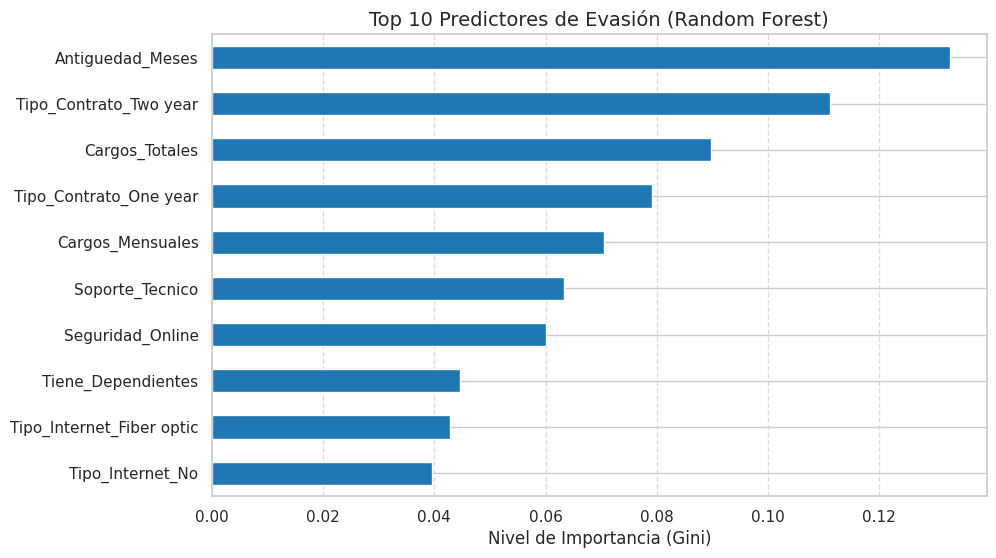

In [131]:
# Extraemos la importancia y la ordenamos de mayor a menor
importancias = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=True)

# Graficamos solo las 10 más importantes para no saturar
importancias.tail(10).plot(kind='barh', color='#1f77b4', figsize=(10, 6))

plt.title('Top 10 Predictores de Evasión (Random Forest)', fontsize=14)
plt.xlabel('Nivel de Importancia (Gini)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

El análisis de importancia de variables muestra que la antigüedad del cliente es el factor más determinante en la predicción de cancelación. Asimismo, el tipo de contrato (especialmente contratos de uno y dos años) presenta una fuerte influencia, lo que indica que el nivel de compromiso contractual es clave en la retención.

Las variables relacionadas con facturación (cargos totales y mensuales) también resultan relevantes, lo que sugiere que el comportamiento financiero del cliente impacta directamente en la probabilidad de evasión.

Finalmente, servicios adicionales como soporte técnico y seguridad online aparecen como factores protectores, lo que evidencia que clientes con mayor integración de servicios tienden a permanecer más tiempo en la empresa.

## Conclusión

###🎯 **Objetivo del análisis**

El objetivo del proyecto fue identificar los principales factores que influyen en la cancelación de clientes y desarrollar modelos predictivos capaces de anticipar el churn, permitiendo a la empresa implementar estrategias de retención efectivas.

-------


### **Principales factores que influyen en la cancelación**

A partir del análisis exploratorio, la matriz de correlación y la importancia de variables en los modelos (Regresión Logística y Random Forest), se identificaron los siguientes factores clave:

**1. Antigüedad del cliente**

La antigüedad fue la variable más importante en el modelo Random Forest.
Los clientes con menor tiempo en la empresa presentan mayor probabilidad de cancelación.

📌 **Interpretación:**
El riesgo de churn es más alto en etapas tempranas del ciclo de vida del cliente.

**2. Tipo de contrato**

Los contratos mensuales presentan mayor tasa de cancelación, mientras que los contratos de uno y dos años actúan como factor protector.

📌 Interpretación:
El nivel de compromiso contractual influye directamente en la retención.

**3. Variables económicas (Cargos mensuales y totales)**

Los modelos indican que el nivel de gasto impacta en la probabilidad de cancelación, especialmente los cargos mensuales elevados.

📌 Interpretación:
El precio y la percepción de valor pueden ser determinantes en la decisión de abandono.

**4. Integración de servicios**

Servicios adicionales como soporte técnico y seguridad online mostraron relevancia en el modelo.

📌 Interpretación:
Clientes con mayor integración de servicios tienden a permanecer más tiempo en la empresa.

-----




### **Evaluación de Modelos**

Se desarrollaron dos modelos principales:

- Regresión Logística (con normalización)

- Random Forest (ajustado con control de profundidad)

El Random Forest ajustado presentó el mejor desempeño en términos de recall para la clase de cancelación (0.697), lo que indica mejor capacidad para identificar clientes en riesgo.

Dado que en problemas de churn es prioritario detectar correctamente a los clientes que podrían abandonar el servicio, el Random Forest ajustado fue seleccionado como el modelo más adecuado.

No se observaron señales evidentes de overfitting o underfitting, ya que el modelo mostró un desempeño equilibrado en el conjunto de prueba.

-----



### **Estrategias de Retención Propuestas**

Basado en los hallazgos, se sugieren las siguientes estrategias:

 **💡1. Programas de fidelización temprana**

 Implementar seguimiento y beneficios especiales durante los primeros meses del cliente para reducir el churn temprano.

**💡2. Incentivar contratos de mayor duración**

Ofrecer descuentos o beneficios adicionales para migrar clientes de contratos mensuales a contratos anuales.

**💡3. Optimización de precios y percepción de valor**

Analizar la estructura de cargos mensuales para clientes de alto riesgo y ofrecer planes personalizados.

**💡4. Promoción de servicios complementarios**

Fomentar la contratación de servicios adicionales que aumenten la integración del cliente y reduzcan la probabilidad de cancelación.

-----

### **🏆Conclusión Estratégica Final**

El análisis demuestra que la cancelación en Telecom X LATAM está principalmente asociada a clientes recientes, con bajo compromiso contractual y menor integración de servicios.

El modelo predictivo desarrollado permite identificar de manera anticipada a los clientes en riesgo, brindando una herramienta valiosa para la toma de decisiones estratégicas y la implementación de acciones preventivas orientadas a mejorar la retención y la rentabilidad del negocio.